In [203]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data processing

In [204]:
df = pd.read_csv('titanic_modified_dataset.csv')
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
0,1,3,0,22.0,1,0,7.2500,0,0,0
1,2,1,1,38.0,1,0,71.2833,1,1,1
2,3,3,1,26.0,0,0,7.9250,0,2,1
3,4,1,1,35.0,1,0,53.1000,0,1,1
4,5,3,0,35.0,0,0,8.0500,0,0,0


– PassengerId: Mã hàng khách. Đây được xem là chỉ mục của bảng dữ liệu
– Pclass: Hạng vé tàu của hàng khách.
– Sex: Giới tính của hàng khách.
– Age: Tuổi của hàng khách.
– SibSp: Số lượng anh chị em và/hoặc người yêu đi cùng chuyến tàu với hàng
khách.
– Parch: Số lượng phụ huynh và/hoặc con cháu đi cùng chuyến tàu với hàng khách.
– Fare: Giá vé tàu của hàng khách.
– Embarked: Cảng xuất phát của hàng khách.
– Title: Tước hiệu của hàng khách.
– Survived: Hàng khách có (1) sống sót qua thảm kịch hay không (0)?

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    int64  
 8   Title        891 non-null    int64  
 9   Survived     891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


In [206]:
# split data
data = df.to_numpy().astype(np.float64)
X , y = data[:,1:-1] , data[:,-1]
print(X[:5])

[[ 3.      0.     22.      1.      0.      7.25    0.      0.    ]
 [ 1.      1.     38.      1.      0.     71.2833  1.      1.    ]
 [ 3.      1.     26.      0.      0.      7.925   0.      2.    ]
 [ 1.      1.     35.      1.      0.     53.1     0.      1.    ]
 [ 3.      0.     35.      0.      0.      8.05    0.      0.    ]]


In [207]:
# add bias to X 
intercept = np.ones((X.shape[0],1))
print(intercept.shape)
print()

X_b = np.concatenate((intercept,X),axis=1)
print(X_b[:5])

(891, 1)

[[ 1.      3.      0.     22.      1.      0.      7.25    0.      0.    ]
 [ 1.      1.      1.     38.      1.      0.     71.2833  1.      1.    ]
 [ 1.      3.      1.     26.      0.      0.      7.925   0.      2.    ]
 [ 1.      1.      1.     35.      1.      0.     53.1     0.      1.    ]
 [ 1.      3.      0.     35.      0.      0.      8.05    0.      0.    ]]


In [208]:
# train, val , test 
val_size = 0.2 
test_size = 0.125
random_state = 2
is_shuffle = True

X_train , X_val , y_train , y_val = train_test_split(
    X_b,y,
    test_size = test_size,
    random_state = random_state,
    shuffle = is_shuffle
)

X_train , X_test , y_train , y_test = train_test_split(
    X_train,y_train,
    test_size = test_size,
    random_state = random_state,
    shuffle = is_shuffle
)

In [209]:
print(f'Number of training samples: {X_train.shape[0]}')
print(f'Number of val samples: {X_val.shape[0]}')
print(f'Number of test samples: {X_test.shape[0]}')

Number of training samples: 681
Number of val samples: 112
Number of test samples: 98


# Normalization

In [210]:
normolizier = StandardScaler()
X_train[:,1:] = normolizier.fit_transform(X_train[:,1:])
X_val[:,1:] = normolizier.fit_transform(X_val[:,1:])
X_test[:,1:] = normolizier.fit_transform(X_test[:,1:])

# Define essential functions

In [211]:
def sigmoid(z):
    return 1/ (1+np.exp(-z))

In [212]:
def predict(X,theta):
    k = X.dot(theta)
    y_hat = sigmoid(k)
    return y_hat

In [213]:
def BCE(y_hat,y):
    
    y_hat = np.clip(y_hat,1e-7,1 - 1e-7)
    
    return (
        -y * np.log(y_hat) - (1-y) * np.log(1-y_hat)
    ).mean()


In [214]:
def compute_gradient(X,y,y_hat):
    return np.dot(
        X.T,(y_hat-y)
    )/y.size
    

In [215]:
def update(theta,gradient,lr):
    return theta - lr*gradient


In [216]:
def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()

    return acc

In [217]:
lr = 0.01
epochs = 100
batch_size = 16

np.random.seed(random_state)
theta = np.random.uniform(
    size=X_train.shape[1]
)

In [218]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i, theta)

        train_loss = BCE(y_hat, y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)

        theta = update(theta, gradient, lr)


        train_batch_losses.append(train_loss)

        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = BCE(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')


EPOCH 1:	Training loss: 0.701	Validation loss: 0.628

EPOCH 2:	Training loss: 0.665	Validation loss: 0.605

EPOCH 3:	Training loss: 0.634	Validation loss: 0.585

EPOCH 4:	Training loss: 0.607	Validation loss: 0.568

EPOCH 5:	Training loss: 0.584	Validation loss: 0.555

EPOCH 6:	Training loss: 0.563	Validation loss: 0.543

EPOCH 7:	Training loss: 0.546	Validation loss: 0.534

EPOCH 8:	Training loss: 0.531	Validation loss: 0.526

EPOCH 9:	Training loss: 0.518	Validation loss: 0.520

EPOCH 10:	Training loss: 0.507	Validation loss: 0.516

EPOCH 11:	Training loss: 0.497	Validation loss: 0.512

EPOCH 12:	Training loss: 0.489	Validation loss: 0.509

EPOCH 13:	Training loss: 0.482	Validation loss: 0.506

EPOCH 14:	Training loss: 0.475	Validation loss: 0.505

EPOCH 15:	Training loss: 0.470	Validation loss: 0.503

EPOCH 16:	Training loss: 0.465	Validation loss: 0.502

EPOCH 17:	Training loss: 0.461	Validation loss: 0.502

EPOCH 18:	Training loss: 0.457	Validation loss: 0.501

EPOCH 19:	Training

Text(0.5, 1.0, 'Validation Accuracy')

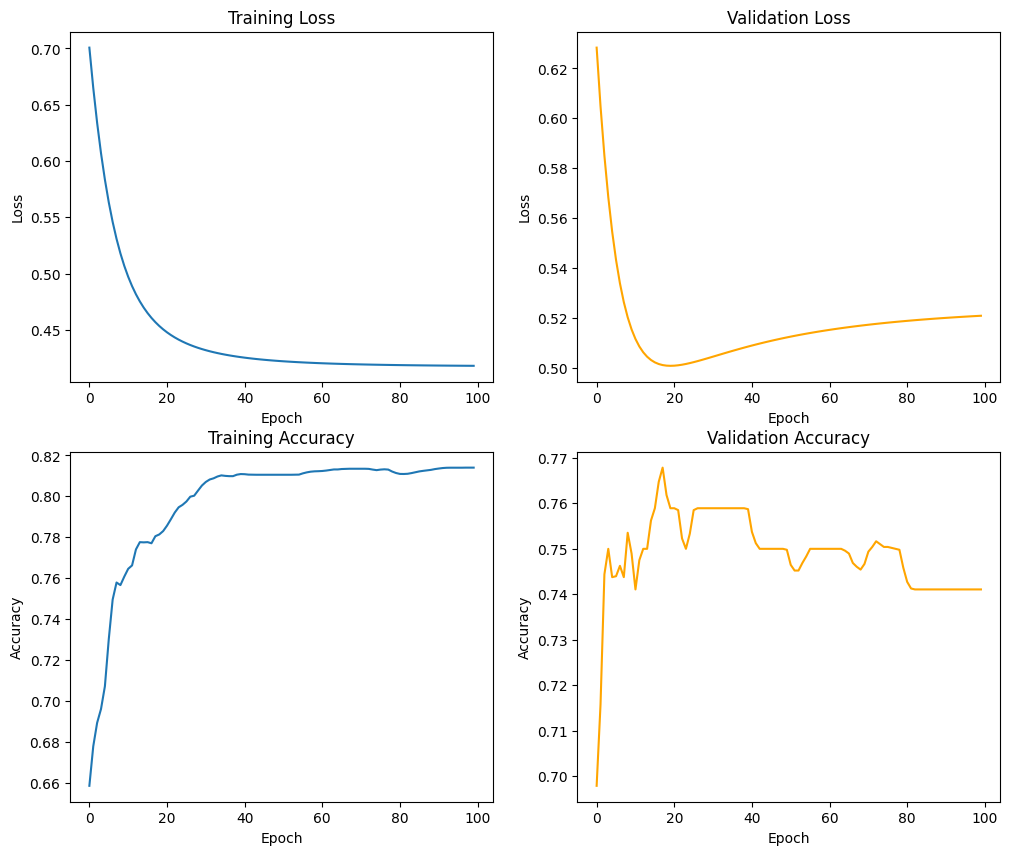

In [219]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')


# Evaluation

In [220]:
# Val set
val_set_acc = compute_accuracy(X_val, y_val, theta)
print('Evaluation on validation set:')
print(f'Accuracy: {val_set_acc}')

Evaluation on validation set:
Accuracy: 0.7410714285714286


In [221]:
# Create random passenger data
random_passenger = np.ones(X_train.shape[1])  # First element is bias (1)

# Generate random values for features
# [Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, Title]
random_passenger[1] = np.random.choice([1, 2, 3])  # Pclass: 1, 2, or 3
random_passenger[2] = np.random.choice([0, 1])     # Sex: 0 (male) or 1 (female)
random_passenger[3] = np.random.randint(20, 80)     # Age: 1-80
random_passenger[4] = np.random.randint(0, 5)      # SibSp: 0-4
random_passenger[5] = np.random.randint(0, 3)      # Parch: 0-2
random_passenger[6] = np.random.uniform(7, 100)    # Fare: 7-100
random_passenger[7] = np.random.choice([0, 1, 2])  # Embarked: 0, 1, or 2
random_passenger[8] = np.random.choice([0, 1, 2])  # Title: 0, 1, or 2


In [222]:
random_passenger[3]

72.0

In [223]:

# Normalize the features (excluding bias)
random_passenger[1:] = normolizier.transform(random_passenger[1:].reshape(1, -1))

# Make prediction
y_pred = predict(random_passenger.reshape(1, -1), theta)
y_pred_class = round(float(y_pred))

print("Random Passenger Details (before normalization):")
print(f"Passenger Class: {int(random_passenger[1])}")
print(f"Sex: {'Female' if random_passenger[2] == 1 else 'Male'}")
print(f"Age: {random_passenger[3]}")
print(f"Siblings/Spouses: {int(random_passenger[4])}")
print(f"Parents/Children: {int(random_passenger[5])}")
print(f"Fare: ${random_passenger[6]:.2f}")
print(f"Embarked: {int(random_passenger[7])}")
print(f"Title: {int(random_passenger[8])}")
print("\nPrediction:")
print(f"Survival Probability: {float(y_pred):.3f}")
print(f"Prediction: {'Survived' if y_pred_class == 1 else 'Did not survive'}")

Random Passenger Details (before normalization):
Passenger Class: 0
Sex: Male
Age: 3.15216220665545
Siblings/Spouses: 1
Parents/Children: 1
Fare: $0.28
Embarked: 2
Title: 0

Prediction:
Survival Probability: 0.011
Prediction: Did not survive


C:\Users\admin\AppData\Local\Temp\ipykernel_16180\2779455701.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_class = round(float(y_pred))
C:\Users\admin\AppData\Local\Temp\ipykernel_16180\2779455701.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Survival Probability: {float(y_pred):.3f}")


# Pytorch

In [224]:
import numpy as np
import torch
import torch.nn as nn

In [225]:
liner = nn.Linear(9,1)
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(liner.parameters(),lr = 0.01)

In [226]:
# Convert numpy arrays to torch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_val_tensor = torch.FloatTensor(X_val)
y_val_tensor = torch.FloatTensor(y_val)

epochs = 100
batch_size = 16
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []
    
    for i in range(0, X_train.shape[0], batch_size):
        x_i = X_train_tensor[i:i+batch_size]
        y_i = y_train_tensor[i:i+batch_size]
        
        # Forward pass
        logits = liner(x_i)
        y_hat = torch.sigmoid(logits)
        loss = loss_fn(logits.squeeze(), y_i)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_batch_losses.append(loss.item())
        
        # Calculate accuracy
        predictions = (y_hat.squeeze() > 0.5).float()
        accuracy = (predictions == y_i).float().mean()
        train_batch_accs.append(accuracy.item())
    
    # Validation step
    with torch.no_grad():
        val_logits = liner(X_val_tensor)
        val_y_hat = torch.sigmoid(val_logits)
        val_loss = loss_fn(val_logits.squeeze(), y_val_tensor)
        
        val_predictions = (val_y_hat.squeeze() > 0.5).float()
        val_accuracy = (val_predictions == y_val_tensor).float().mean()
        
    # Record metrics
    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    
    train_losses.append(train_batch_loss)
    val_losses.append(val_loss.item())
    train_accs.append(train_batch_acc)
    val_accs.append(val_accuracy.item())
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}: Train Loss: {train_batch_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_batch_acc:.4f}, Val Acc: {val_accuracy:.4f}')

Epoch 10: Train Loss: 0.4691, Val Loss: 0.5175, Train Acc: 0.7844, Val Acc: 0.7411
Epoch 20: Train Loss: 0.4379, Val Loss: 0.5111, Train Acc: 0.7993, Val Acc: 0.7500
Epoch 30: Train Loss: 0.4282, Val Loss: 0.5127, Train Acc: 0.8065, Val Acc: 0.7500
Epoch 40: Train Loss: 0.4239, Val Loss: 0.5150, Train Acc: 0.8080, Val Acc: 0.7411
Epoch 50: Train Loss: 0.4216, Val Loss: 0.5170, Train Acc: 0.8109, Val Acc: 0.7500
Epoch 60: Train Loss: 0.4202, Val Loss: 0.5185, Train Acc: 0.8094, Val Acc: 0.7500
Epoch 70: Train Loss: 0.4194, Val Loss: 0.5197, Train Acc: 0.8109, Val Acc: 0.7500
Epoch 80: Train Loss: 0.4188, Val Loss: 0.5207, Train Acc: 0.8109, Val Acc: 0.7500
Epoch 90: Train Loss: 0.4185, Val Loss: 0.5214, Train Acc: 0.8094, Val Acc: 0.7411
Epoch 100: Train Loss: 0.4182, Val Loss: 0.5220, Train Acc: 0.8123, Val Acc: 0.7411


Text(0.5, 1.0, 'Validation Accuracy')

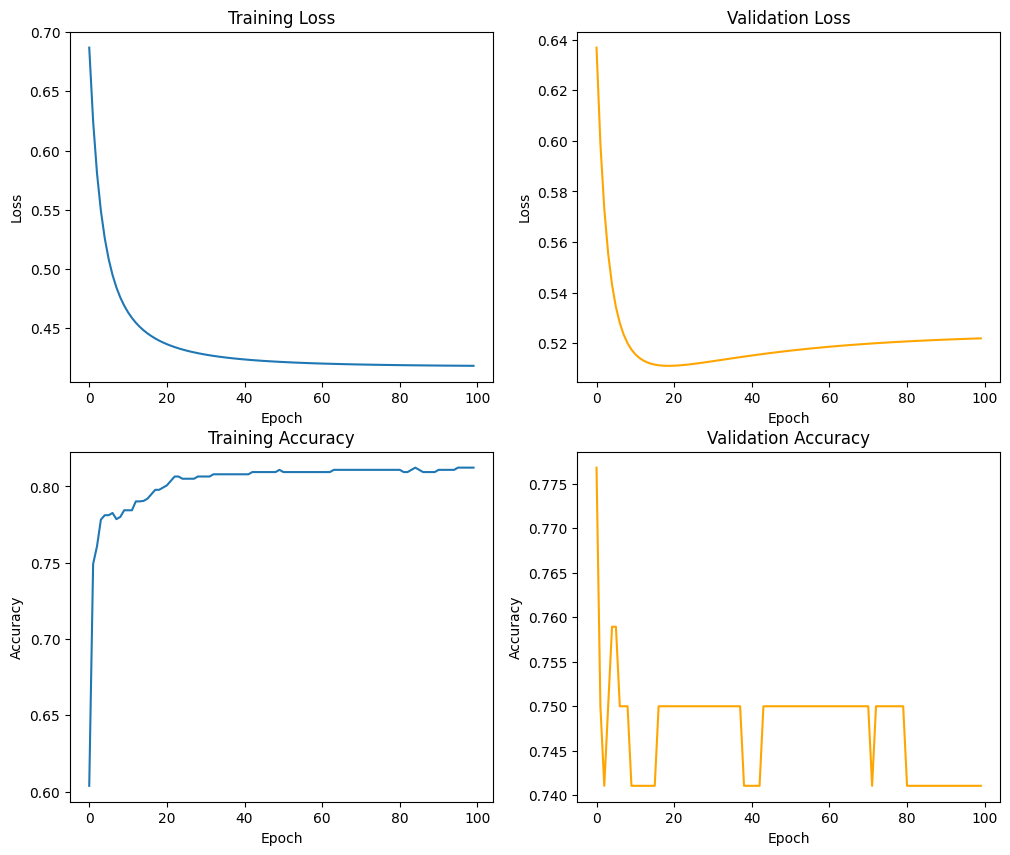

In [227]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')